In [1]:
# Import Modules
import numpy as np # For Math
import pandas as pd # For Data Structures
import matplotlib as mpl # For Plotting Tools Library
import matplotlib.pyplot as plt # For Plotting
from pylab import cm # For Colors
from astropy.timeseries import LombScargle # For FFT Analysis
import os # For interacting with Operating System


# import time as TIME
# import csv
# from astropy.convolution import convolve, Box1DKernel
# from scipy.signal import medfilt
# import math

Opening F Type Stars


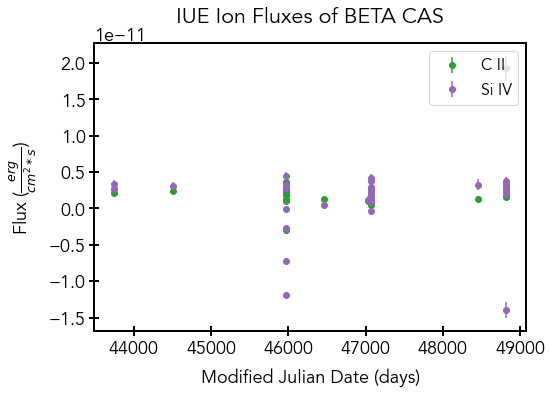

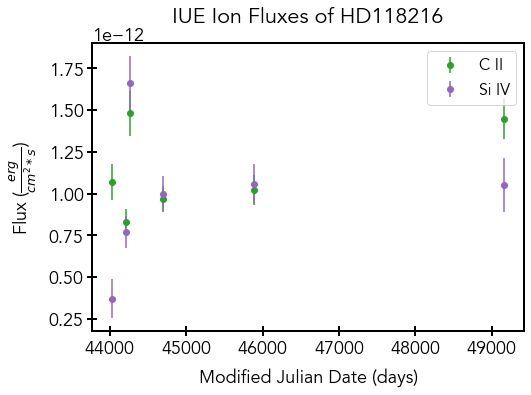

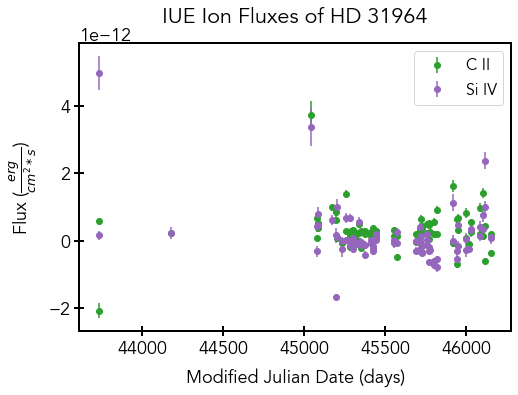

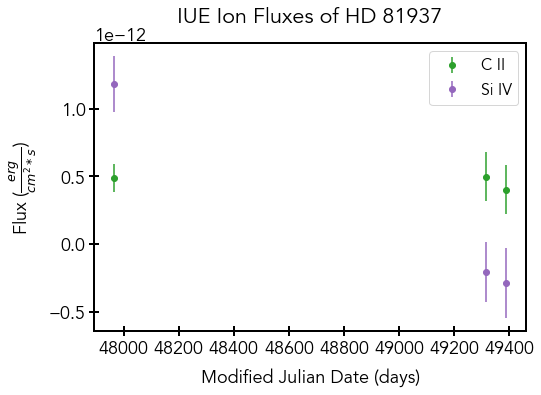

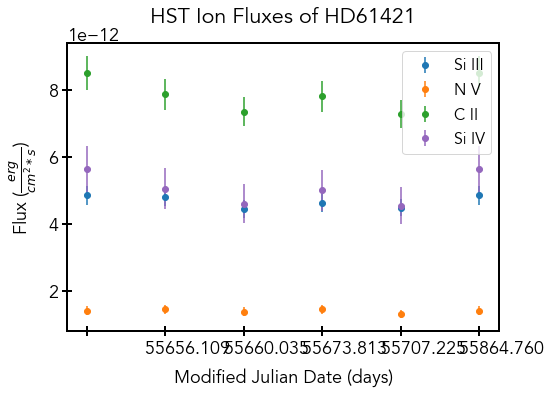

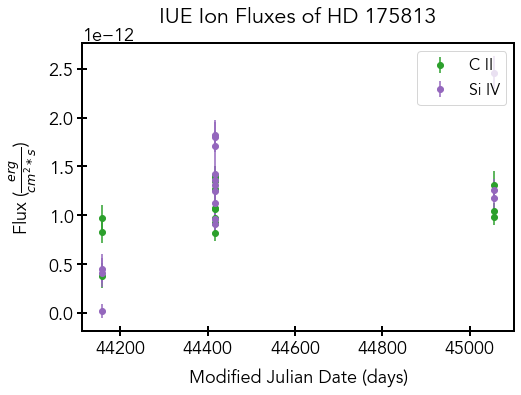

Opening G Type Stars


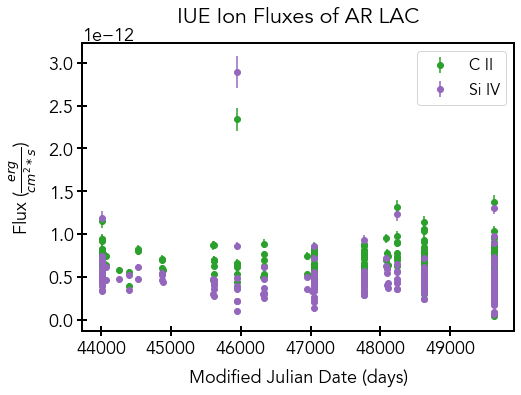

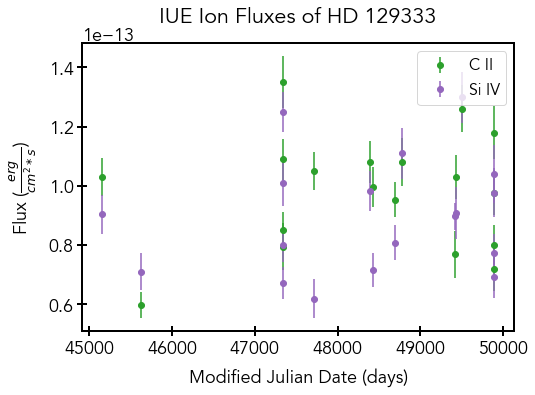

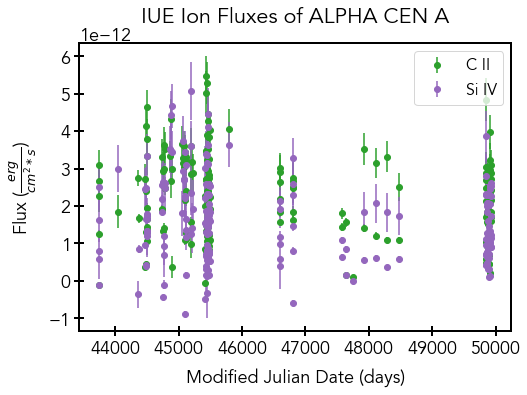

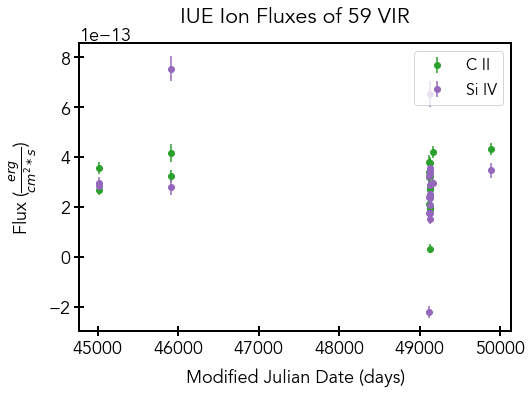

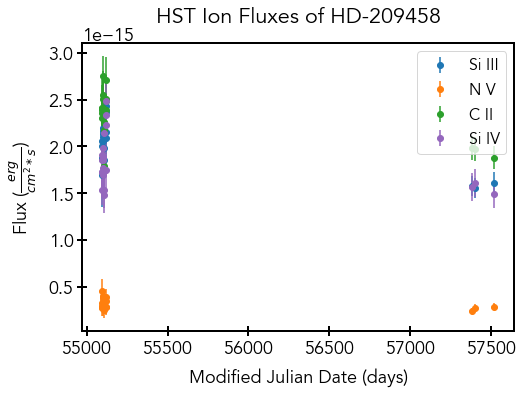

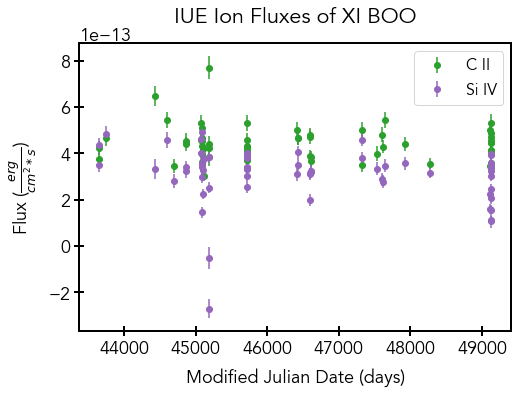

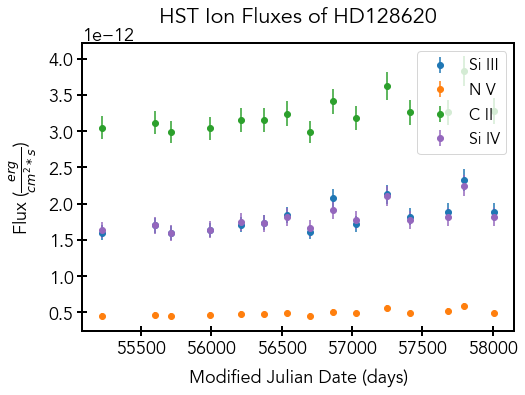

Opening K Type Stars


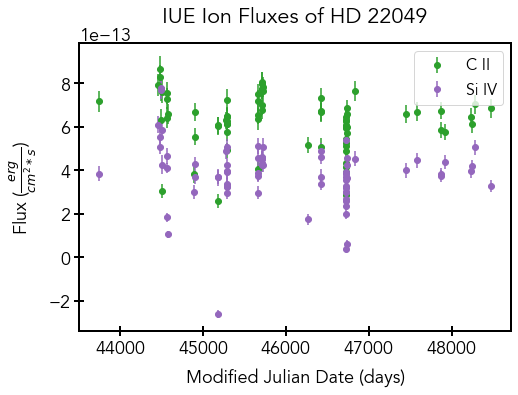

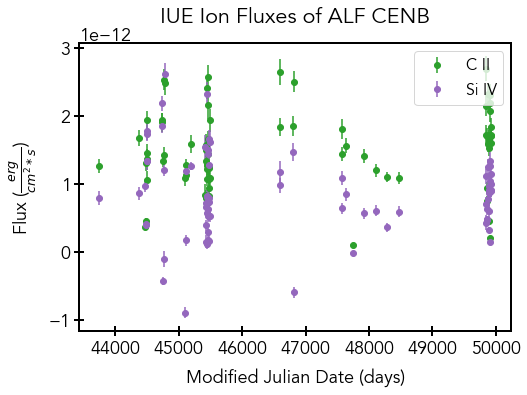

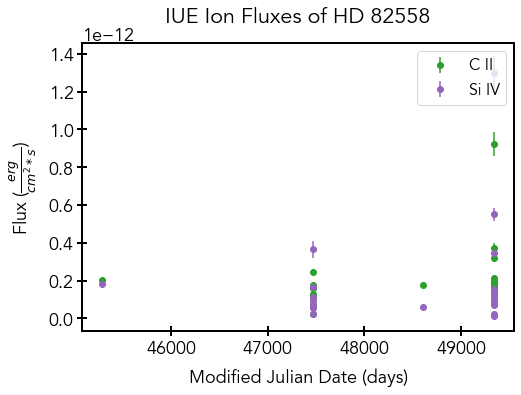

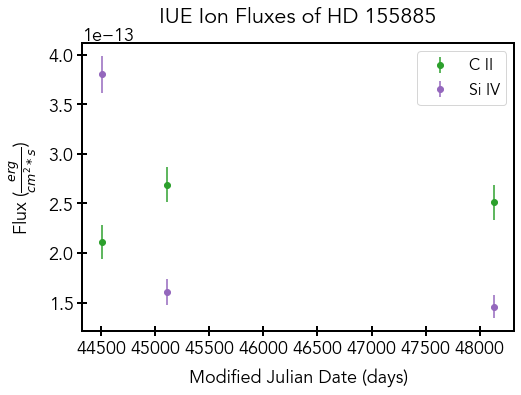

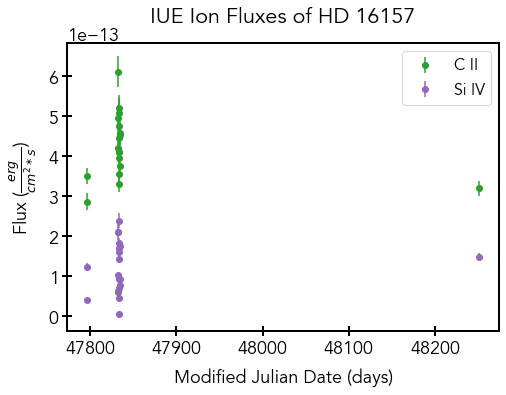

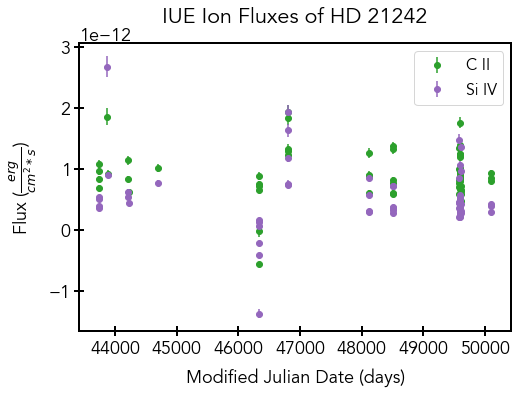

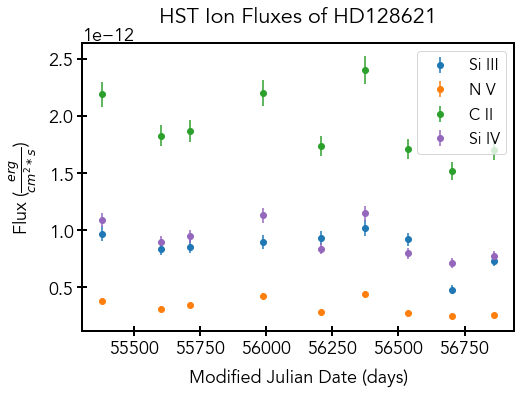

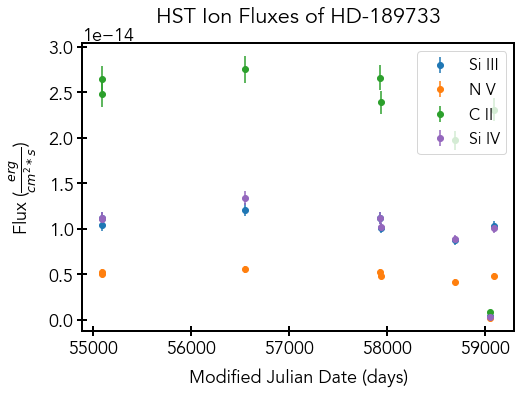

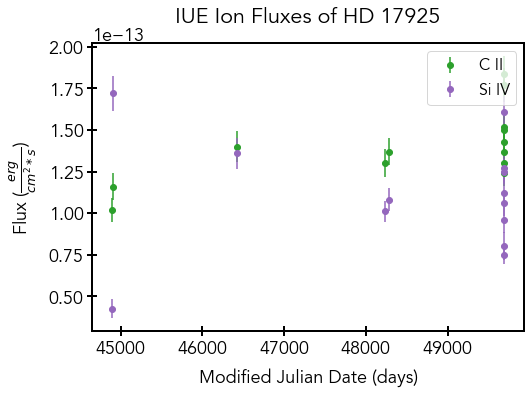

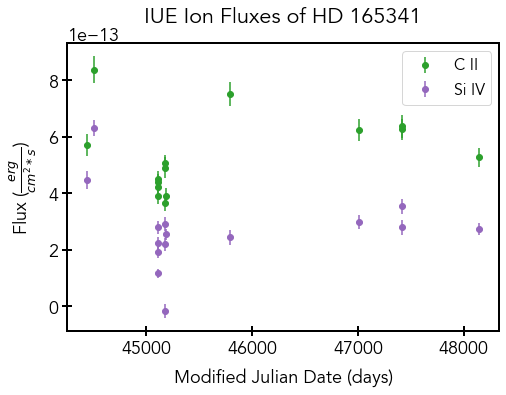

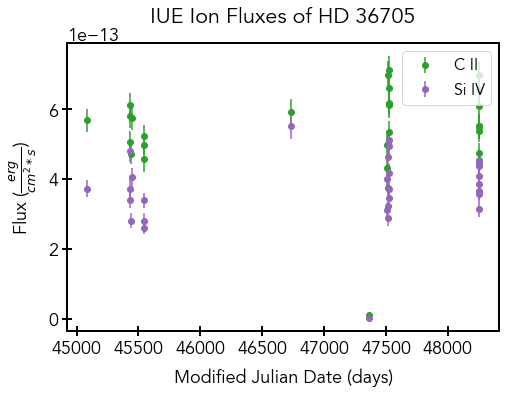

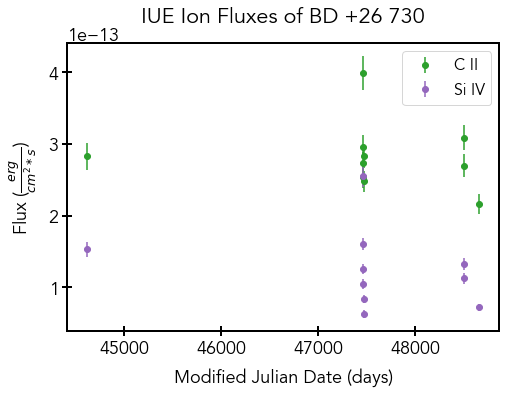

Opening M Type Stars


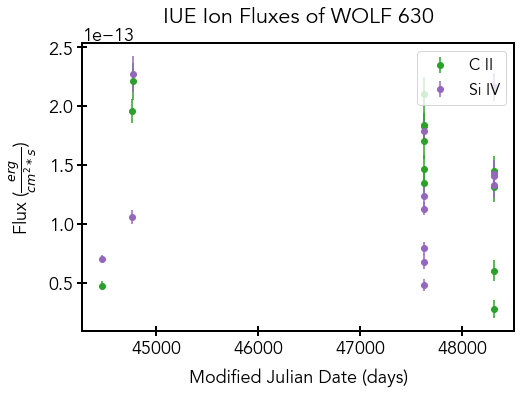

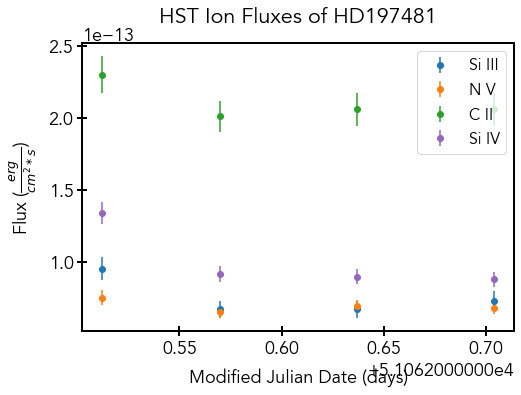

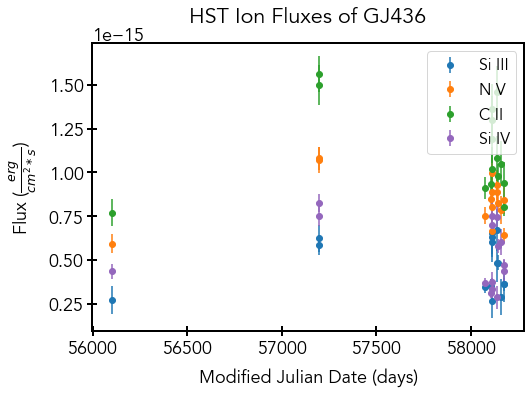

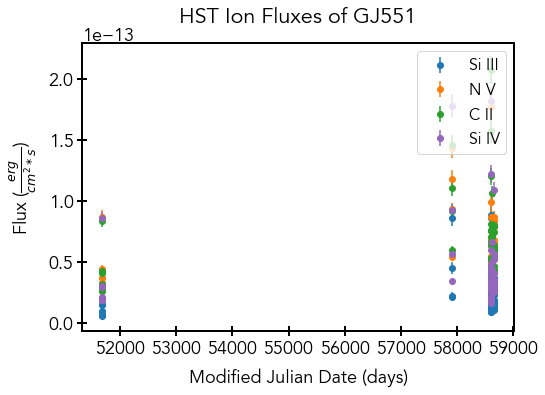

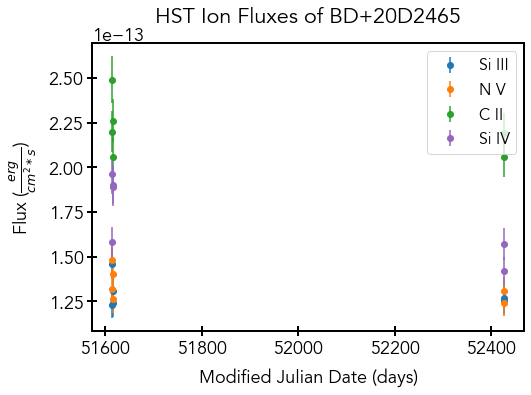

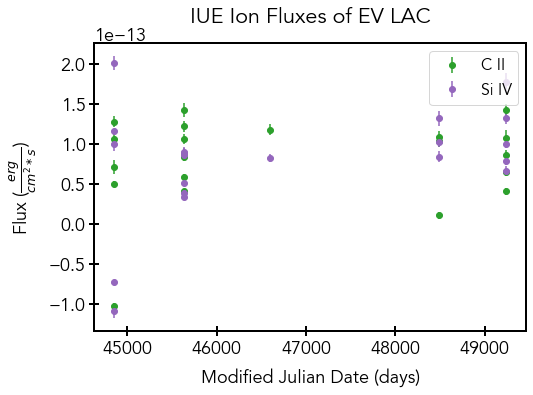

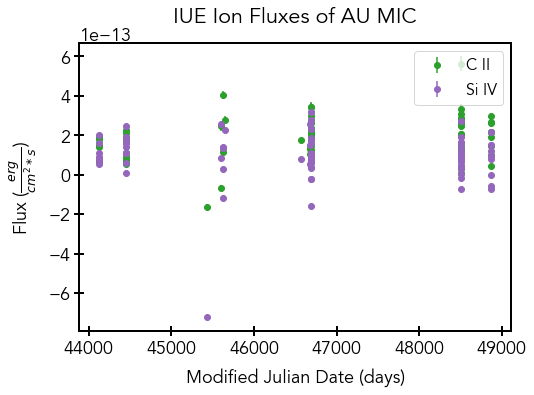

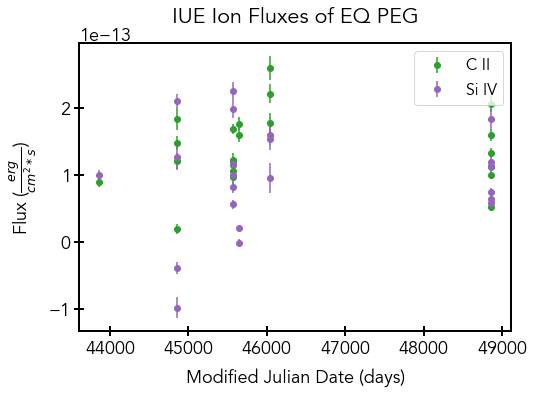

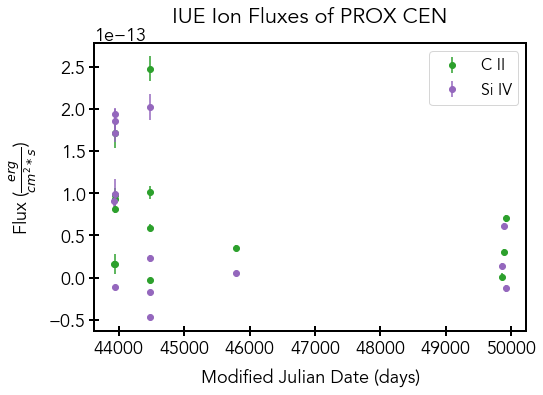

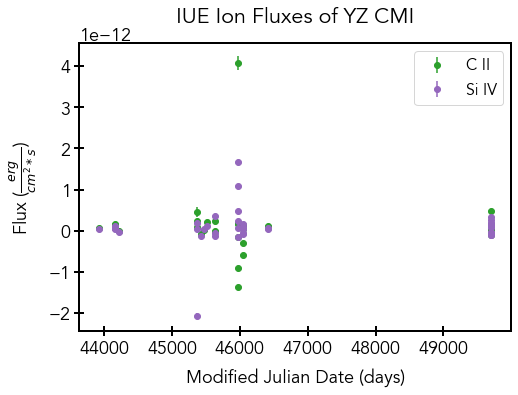

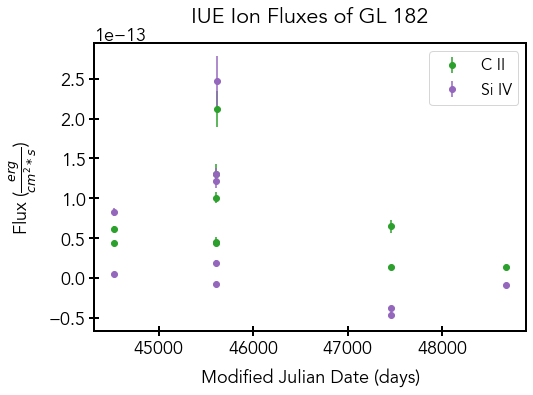

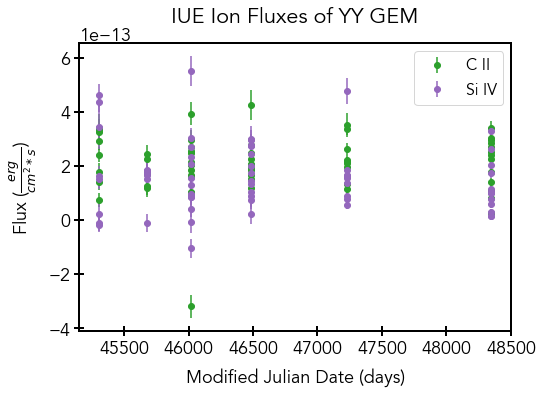

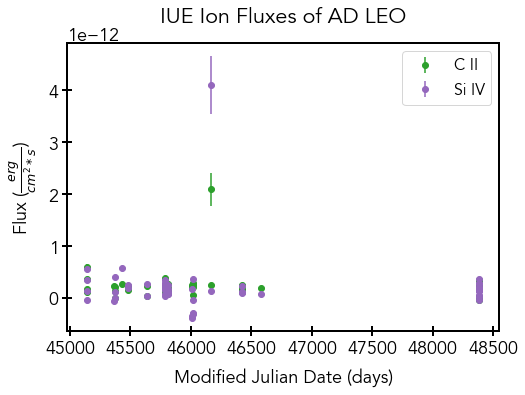

In [3]:
spec_types = ['F','G','K','M']

######################################################################################################################
# FILE READING #

# Repeats for all spectral types
for tp in spec_types:
    print('Opening ' + tp + ' Type Stars')
    
    # Setup Paths
    data_folder = '/Users/leokamgar/jupyter/APPM 3310/APPM-3310-Final-Project/RAW_DATA/' + tp + '_STARS/'
    raw_plot_folder = '/Users/leokamgar/jupyter/APPM 3310/APPM-3310-Final-Project/PLOTS/RAW/' + tp + '_STARS/'
    wavelet_plot_folder = '/Users/leokamgar/jupyter/APPM 3310/APPM-3310-Final-Project/PLOTS/WAVELET/' + tp + '_STARS/'
    fft_plot_folder = '/Users/leokamgar/jupyter/APPM 3310/APPM-3310-Final-Project/PLOTS/FFT/' + tp + '_STARS/'
    
    # Opens all files within the spectral data folders
    for filename in os.listdir(data_folder):
        data_file = data_folder + filename
        
        # Reads data, if error, then prints and moves on to next file
        try:
            data = pd.read_csv(data_file)
        except Exception as e: 
            print(e)
            print('Error with reading: ' + filename + ' in ' + tp + ' type stars!')
            continue
        
        # Sorts data in ascending order by Time
        data = data.sort_values(by=['MJDstart'], axis=0, ascending=True)
        
        # Determines if from IUE or HST telescope
        if 'iue' in filename:
            iue = True
        else:
            iue = False
            
######################################################################################################################
# DATA RETRIEVAL #

        # Set arrays from data set
        time = data['MJDstart']
        flux_Si3 = data[' F(Si3)']
        error_Si3 = data['  E(Si3)']
        background_Si3 = data['  B(Si3)']
        flux_N5 = data['  F(N5)']
        error_N5 = data['  E(N5)']
        background_N5 = data['  B(N5)']
        flux_C2 = data['  F(C2)']
        error_C2 = data['  E(C2)']
        background_C2 = data['  B(C2)']
        flux_Si4 = data['  F(Si4)']
        error_Si4 = data['  E(Si4)']
        background_Si4 = data['  B(Si4)']
        col_name = data['Targname']
        
######################################################################################################################
# DATA CLEANUP #

        # Cleans up name of star
        name = col_name[1].strip()
        # Converts Julien Date (What IUE Data Represented As) to Modified Julian Date
        if iue:
            time = time - 2400000.5
            
######################################################################################################################
# PLOTTING #
    
        mpl.rcParams['font.family'] = 'Avenir'
        plt.rcParams['font.size'] = 18
        plt.rcParams['axes.linewidth'] = 2
        colors = cm.get_cmap('tab10', 8)

        # Create figure and add axes object
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        fig.patch.set_facecolor('#ffffff')

        # Scatter plot with error bars
        if not iue:
            ax.errorbar(time, flux_Si3, yerr=error_Si3, fmt='o', color=colors(0), label = r'Si III')
            ax.errorbar(time, flux_N5, yerr=error_N5, fmt='o', color=colors(1), label = r'N V')
        ax.errorbar(time, flux_C2, yerr=error_C2, fmt='o', color=colors(2), label = r'C II')
        ax.errorbar(time, flux_Si4, yerr=error_Si4, fmt='o', color=colors(3), label = r'Si IV')

        # Set tick formatting
        ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
        ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')
        ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
        ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')

        # Title the plot and axes
        if iue:
            ax.set_title('IUE Ion Fluxes of ' + name, y=1.05)
        else:
            ax.set_title('HST Ion Fluxes of ' + name, y=1.05)
        ax.set_xlabel('Modified Julian Date (days)', labelpad=10)
        ax.set_ylabel('Flux ($\\frac{erg}{cm^2 * s}$)', labelpad=10)

        ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=True, fontsize=16)
        
        # Save plot
        if not iue:
            plt.savefig(raw_plot_folder + 'HST_' + name + '.png', transparent=False, bbox_inches='tight')
        else:
            plt.savefig(raw_plot_folder + 'IUE_' + name + '.png', transparent=False, bbox_inches='tight')
            
        # Show plot
#         plt.show()

######################################################################################################################
# Fast Fourier Transform to Compare #

#             # Lomb Scargle Data Sifting
#         for p_star_name in p_star_names:
#             if name in p_star_name:
#                 if (iue and 'IUE' in p_star_name) or (not iue and 'HST' in p_star_name):
#                     if iue:
#                         print(name + ": IUE")
#                     else:
#                         print(name + ": HST")
#                     # Structure: [star][x data set (Time for one of the ions)]
#                     p_x_data.append([name, "IUE" if iue else "HST" ,time_Si3,time_N5,time_C2,time_Si4])
#                     p_y_data.append([name, "IUE" if iue else "HST" ,f_f_Si3,f_f_N5,f_f_C2,f_f_Si4])

######################################################################################################################
# Wavelet Transform #

In [ ]:
# p_star_names = ['IUE_* alf Cen B','IUE_* eps Eri','IUE_* ksi Boo','HST_* alf Cen A','HST_* alf Cen B']

df_arr = []

for n in range(len(p_star_names)):
    
    df = pd.DataFrame()
    frequencySi3, powerSi3 = LombScargle(p_x_data[n][2], p_y_data[n][2]).autopower()
    frequencyN5, powerN5 = LombScargle(p_x_data[n][3], p_y_data[n][3]).autopower()
    frequencyC2, powerC2 = LombScargle(p_x_data[n][4], p_y_data[n][4]).autopower()
    frequencySi4, powerSi4 = LombScargle(p_x_data[n][5], p_y_data[n][5]).autopower()
    
    periodSi3 = 1 / frequencySi3
    periodN5 = 1 / frequencyN5
    periodC2 = 1 / frequencyC2
    periodSi4 = 1 / frequencySi4
    
    logPeriodSi3 = np.log10(periodSi3)
    logPeriodN5 = np.log10(periodN5)
    logPeriodC2 = np.log10(periodC2)
    logPeriodSi4 = np.log10(periodSi4)
    
    ### Smoothing Functions

    smoothedPowerSi3 = medfilt(powerSi3, kernel_size=3)
    smoothedPowerN5 = medfilt(powerN5, kernel_size=3)
    smoothedPowerC2 = medfilt(powerC2, kernel_size=3)
    smoothedPowerSi4 = medfilt(powerSi4, kernel_size=3)
    
    smoothedPowerSi3 = convolve(smoothedPowerSi3, Box1DKernel(5))
    smoothedPowerN5 = convolve(smoothedPowerN5, Box1DKernel(5))
    smoothedPowerC2 = convolve(smoothedPowerC2, Box1DKernel(5))
    smoothedPowerSi4 = convolve(smoothedPowerSi4, Box1DKernel(5))
    
    ### Means 
    
    meanC2 = np.mean(smoothedPowerC2)
    meanSi4 = np.mean(smoothedPowerSi4)
    stdC2 = np.std(smoothedPowerC2)
    stdSi4 = np.std(smoothedPowerSi4)
    
    ### Data Frame
    
    peakC2 = np.logical_and(smoothedPowerC2 > meanC2 + stdC2, np.logical_and(logPeriodC2 > .5, logPeriodC2 < 3.7))
    peakSi4 = np.logical_and(smoothedPowerSi4 > meanSi4 + stdSi4, np.logical_and(logPeriodSi4 > .5, logPeriodSi4 < 3.7))
    periodPeak_C2_data = logPeriodC2[peakC2]
    periodPeak_Si4_data = logPeriodSi4[peakSi4]
    powerPeak_C2_data = smoothedPowerC2[peakC2]
    powerPeak_Si4_data = smoothedPowerSi4[peakSi4]
    signifPeak_C2_data = (powerPeak_C2_data - meanC2) / stdC2
    signifPeak_Si4_data = (powerPeak_Si4_data - meanC2) / stdSi4
    
    if 'HST' == p_x_data[n][1]:
        meanSi3 = np.mean(smoothedPowerSi3)
        meanN5 = np.mean(smoothedPowerN5)
        stdSi3 = np.std(smoothedPowerSi3)
        stdN5 = np.std(smoothedPowerN5)
        
        peakSi3 = np.logical_and(smoothedPowerSi3 > meanSi3 + stdSi3, np.logical_and(logPeriodSi3 > .5, logPeriodSi3 < 3.7))
        peakN5 = np.logical_and(smoothedPowerN5 > meanN5 + stdN5, np.logical_and(logPeriodN5 > .5, logPeriodN5 < 3.7))
        periodPeak_Si3_data = logPeriodSi3[peakSi3]
        periodPeak_N5_data = logPeriodN5[peakN5]
        powerPeak_Si3_data = smoothedPowerSi3[peakSi3]
        powerPeak_N5_data = smoothedPowerN5[peakN5]
        signifPeak_Si3_data = (powerPeak_Si3_data - meanSi3) / stdSi3
        signifPeak_N5_data = (powerPeak_N5_data - meanN5) / stdN5
        
        len_df = max([len(periodPeak_Si3_data),len(periodPeak_N5_data),len(periodPeak_C2_data),len(periodPeak_Si4_data)])
        df.loc[:, 'Temp Fix'] = pd.Series([None] * len_df)
        
        df.loc[:, 'Si III Peak Period'] = pd.Series(periodPeak_Si3_data)
        df.loc[:, 'Si III Peak Significance'] = pd.Series(signifPeak_Si3_data)
        df.loc[:, 'N V Peak Period'] = pd.Series(periodPeak_N5_data)
        df.loc[:, 'N V Peak Significance'] = pd.Series(signifPeak_N5_data)
        df.loc[:, 'C II Peak Period'] = pd.Series(periodPeak_C2_data)
        df.loc[:, 'C II Peak Significance'] = pd.Series(signifPeak_C2_data)
        df.loc[:, 'Si IV Peak Period'] = pd.Series(periodPeak_Si4_data)
        df.loc[:, 'Si IV Peak Significance'] = pd.Series(signifPeak_Si4_data)
        
        df = df.drop(columns=['Temp Fix'])
        df = df.style.set_caption(f'{p_x_data[n][1]} {p_x_data[n][0]}')
        df.name = f'{p_x_data[n][1]} {p_x_data[n][0]}'
        df_arr.append(df)
        
        fig, axs = plt.subplots(2, 2, figsize=(12,11), constrained_layout = True)
        fig.suptitle(f'{p_x_data[n][1]} {greekify(p_x_data[n][0])} Lomb Scargle Periodogram Analysis', fontsize=25)
        fig.patch.set_facecolor('#f8f8f8')
        
        axs[0, 0].plot(logPeriodSi3, smoothedPowerSi3, color=colors(0), label='Si III')
        axs[0, 0].plot([min(logPeriodSi3), max(logPeriodSi3)], [meanSi3, meanSi3], 'r-')
        axs[0, 0].plot([min(logPeriodSi3), max(logPeriodSi3)], [meanSi3 + stdSi3, meanSi3 + stdSi3], 'r--')
        axs[0, 0].plot([min(logPeriodSi3), max(logPeriodSi3)], [meanSi3 - stdSi3, meanSi3 - stdSi3], 'r--')
        axs[0, 0].legend()
        axs[0, 0].set_title('Power vs Period')
        axs[0, 0].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[0, 0].set_xlim([min(logPeriodSi3), 3.7])
        axs[0, 1].plot(logPeriodN5, smoothedPowerN5, color=colors(1), label='N V')
        axs[0, 1].plot([min(logPeriodN5), max(logPeriodN5)], [meanN5, meanN5], 'r-')
        axs[0, 1].plot([min(logPeriodN5), max(logPeriodN5)], [meanN5 + stdN5, meanN5 + stdN5], 'r--')
        axs[0, 1].plot([min(logPeriodN5), max(logPeriodN5)], [meanN5 - stdN5, meanN5 - stdN5], 'r--')
        axs[0, 1].legend()
        axs[0, 1].yaxis.set_label_position("right")
        axs[0, 1].yaxis.tick_right()
        axs[0, 1].set_title('Power vs Period')
        axs[0, 1].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[0, 1].set_xlim([min(logPeriodN5), 3.7])
        axs[1, 0].plot(logPeriodC2, smoothedPowerC2, color=colors(2), label='C II')
        axs[1, 0].plot([min(logPeriodC2), max(logPeriodC2)], [meanC2, meanC2], 'r-')
        axs[1, 0].plot([min(logPeriodC2), max(logPeriodC2)], [meanC2 + stdC2, meanC2 + stdC2], 'r--')
        axs[1, 0].plot([min(logPeriodC2), max(logPeriodC2)], [meanC2 - stdC2, meanC2 - stdC2], 'r--')
        axs[1, 0].legend()
        axs[1, 0].set_title('Power vs Period')
        axs[1, 0].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[1, 0].set_xlim([min(logPeriodC2), 3.7])
        axs[1, 1].plot(logPeriodSi4, smoothedPowerSi4, color=colors(3), label='Si IV')
        axs[1, 1].plot([min(logPeriodSi4), max(logPeriodSi4)], [meanSi4, meanSi4], 'r-')
        axs[1, 1].plot([min(logPeriodSi4), max(logPeriodSi4)], [meanSi4 + stdSi4, meanSi4 + stdSi4], 'r--')
        axs[1, 1].plot([min(logPeriodSi4), max(logPeriodSi4)], [meanSi4 - stdSi4, meanSi4 - stdSi4], 'r--')
        axs[1, 1].legend()
        axs[1, 1].yaxis.set_label_position("right")
        axs[1, 1].yaxis.tick_right()
        axs[1, 1].set_title('Power vs Period')
        axs[1, 1].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[1, 1].set_xlim([min(logPeriodSi4), 3.7])
    else: 
        len_df = max([len(periodPeak_C2_data),len(periodPeak_Si4_data)])
        df.loc[:, 'Temp Fix'] = pd.Series([None] * len_df)
        
        df.loc[:, 'C II Peak Period'] = pd.Series(periodPeak_C2_data)
        df.loc[:, 'C II Peak Significance'] = pd.Series(signifPeak_C2_data)
        df.loc[:, 'Si IV Peak Period'] = pd.Series(periodPeak_Si4_data)
        df.loc[:, 'Si IV Peak Significance'] = pd.Series(signifPeak_Si4_data)
        
        df = df.drop(columns=['Temp Fix'])
        df = df.style.set_caption(f'{p_x_data[n][1]} {p_x_data[n][0]}')
        df.name = f'{p_x_data[n][1]} {p_x_data[n][0]}'
        df_arr.append(df)
        
        fig, axs = plt.subplots(1, 2, figsize=(12,5.5), constrained_layout = True)
        fig.suptitle(f'{p_x_data[n][1]} {greekify(p_x_data[n][0])} Lomb Scargle Periodogram Analysis', fontsize=25)
        fig.patch.set_facecolor('#f8f8f8')

        axs[0].plot(logPeriodC2, smoothedPowerC2, color=colors(2), label='C II')
        axs[0].plot([min(logPeriodC2), max(logPeriodC2)], [meanC2, meanC2], 'r-')
        axs[0].plot([min(logPeriodC2), max(logPeriodC2)], [meanC2 + stdC2, meanC2 + stdC2], 'r--')
        axs[0].plot([min(logPeriodC2), max(logPeriodC2)], [meanC2 - stdC2, meanC2 - stdC2], 'r--')
        axs[0].legend()
        axs[0].set_title('Power vs Period')
        axs[0].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[0].set_xlim([min(logPeriodC2), 3.7])
        axs[1].plot(logPeriodSi4, smoothedPowerSi4, color=colors(3), label='Si IV')
        axs[1].plot([min(logPeriodSi4), max(logPeriodSi4)], [meanSi4, meanSi4], 'r-')
        axs[1].plot([min(logPeriodSi4), max(logPeriodSi4)], [meanSi4 + stdSi4, meanSi4 + stdSi4], 'r--')
        axs[1].plot([min(logPeriodSi4), max(logPeriodSi4)], [meanSi4 - stdSi4, meanSi4 - stdSi4], 'r--')
        axs[1].legend()
        axs[1].yaxis.set_label_position("right")
        axs[1].yaxis.tick_right()
        axs[1].set_title('Power vs Period')
        axs[1].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[1].set_xlim([min(logPeriodSi4), 3.7])
    
    plot_loc = f'Star_Properties/Periodicity_Graph_Panels/{df.name}.png'
    plot_loc = plot_loc.replace(" ", "_")
    plt.savefig(plot_loc)